In [3]:
# Chargement des librairies nécessaires
library(ggplot2)
library(tidyverse)
library(gridExtra)
library(GGally)
library(plotly)
library(corrplot)
library(reshape2)
library(FactoMineR) 
library(factoextra)
library(glmnet) 
library(ggfortify)
library(pROC)
library(ROCR)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.1     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : ‘gridExtra’


L'objet suivant est masqué depuis ‘package:dplyr’:

    combine


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attachement du package : ‘plotly’


L'objet suivant est masqué depuis ‘package:ggplot2’:

    last_plot


L'objet suivant est masqué depuis ‘package:stats’:

    filter


L'objet suivant est masqué depuis ‘package:graphics’:

    layout


corrplot 0.92 loaded


Attachement du package : ‘reshape2’


L'objet sui

In [106]:
# Lecture des données
energy <- read.table("energy.txt", sep = ",", header = TRUE)
# Premières lignes du jeu de données
head(energy)
# Vérification du contenu
summary(energy)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.electricity.generating.capacity.per.capita,Financial.flows.to.developing.countries..US...,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,⋯,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,Renewables....equivalent.primary.energy.,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,9.22,20000,44.99,0.16,0,0.31,⋯,302.5948,1.64,760,NA,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,8.86,130000,45.60,0.09,0,0.50,⋯,236.8919,1.74,730,NA,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,8.47,3950000,37.83,0.13,0,0.56,⋯,210.8622,1.40,1030,NA,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,8.09,25970000,36.66,0.31,0,0.63,⋯,229.9682,1.40,1220,NA,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,7.75,NA,44.24,0.33,0,0.56,⋯,204.2312,1.20,1030,NA,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,7.51,9830000,33.88,0.34,0,0.59,⋯,252.0691,1.41,1550,NA,11.229715,242.0313,60,652230,33.93911,67.70995


    Entity               Year      Access.to.electricity....of.population.
 Length:3649        Min.   :2000   Min.   :  1.252                        
 Class :character   1st Qu.:2005   1st Qu.: 59.801                        
 Mode  :character   Median :2010   Median : 98.362                        
                    Mean   :2010   Mean   : 78.934                        
                    3rd Qu.:2015   3rd Qu.:100.000                        
                    Max.   :2020   Max.   :100.000                        
                                   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [107]:
# Conversion de la variable Year en facteur
energy$Year <- as.factor(energy$Year)
# Conversion de la variable Density en variable numérique
energy$Density.n.P.Km2. <- as.numeric(gsub(",", ".", energy$Density.n.P.Km2.))
summary(energy)

    Entity               Year      Access.to.electricity....of.population.
 Length:3649        2013   : 175   Min.   :  1.252                        
 Class :character   2014   : 175   1st Qu.: 59.801                        
 Mode  :character   2015   : 175   Median : 98.362                        
                    2016   : 175   Mean   : 78.934                        
                    2017   : 175   3rd Qu.:100.000                        
                    2018   : 175   Max.   :100.000                        
                    (Other):2599   NA's   :10                             
 Access.to.clean.fuels.for.cooking
 Min.   :  0.00                   
 1st Qu.: 23.18                   
 Median : 83.15                   
 Mean   : 63.26                   
 3rd Qu.:100.00                   
 Max.   :100.00                   
 NA's   :169                      
 Renewable.electricity.generating.capacity.per.capita
 Min.   :   0.00                                     
 1st Qu.:   

In [108]:
missing_data <- colMeans(is.na(energy)) * 100

# Trier les résultats par ordre décroissant
sorted_missing_data <- sort(missing_data, decreasing = TRUE)

# Afficher les résultats de manière propre
cat("Pourcentage de données manquantes par variable (ordre décroissant):\n")
for (i in seq_along(sorted_missing_data)) {
  cat(names(sorted_missing_data)[i], ": ", sprintf("%.2f", sorted_missing_data[i]), "%\n")
}
# Suppression de la varible Renewable.electricity.generating.capacity.per.capita
energy <- subset(energy, select = -Renewable.electricity.generating.capacity.per.capita)
# Suppression de la variable Financial.flows.to.developing.countries..US...
energy <- subset(energy, select = -Financial.flows.to.developing.countries..US...)
# Suppression de la variable Renewables....equivalent.primary.energy.
energy <- subset(energy, select =  -Renewables....equivalent.primary.energy.)
head(energy)

Pourcentage de données manquantes par variable (ordre décroissant):
Renewables....equivalent.primary.energy. :  58.56 %
Financial.flows.to.developing.countries..US... :  57.25 %
Renewable.electricity.generating.capacity.per.capita :  25.51 %
Value_co2_emissions_kt_by_country :  11.73 %
gdp_growth :  8.69 %
gdp_per_capita :  7.73 %
Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP. :  5.67 %
Renewable.energy.share.in.the.total.final.energy.consumption.... :  5.32 %
Access.to.clean.fuels.for.cooking :  4.63 %
Electricity.from.nuclear..TWh. :  3.45 %
Low.carbon.electricity....electricity. :  1.15 %
Electricity.from.fossil.fuels..TWh. :  0.58 %
Electricity.from.renewables..TWh. :  0.58 %
Access.to.electricity....of.population. :  0.27 %
Density.n.P.Km2. :  0.03 %
Land.Area.Km2. :  0.03 %
Latitude :  0.03 %
Longitude :  0.03 %
Entity :  0.00 %
Year :  0.00 %
Primary.energy.consumption.per.capita..kWh.person. :  0.00 %


,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,Afghanistan,2000,1.613591,6.2,44.99,0.16,0,0.31,65.95744,302.5948,1.64,760,NA,NA,60,652230,33.93911,67.70995
2,Afghanistan,2001,4.074574,7.2,45.60,0.09,0,0.50,84.74577,236.8919,1.74,730,NA,NA,60,652230,33.93911,67.70995
3,Afghanistan,2002,9.409158,8.2,37.83,0.13,0,0.56,81.15942,210.8622,1.40,1030,NA,179.4266,60,652230,33.93911,67.70995
4,Afghanistan,2003,14.738506,9.5,36.66,0.31,0,0.63,67.02128,229.9682,1.40,1220,8.832278,190.6838,60,652230,33.93911,67.70995
5,Afghanistan,2004,20.064968,10.9,44.24,0.33,0,0.56,62.92135,204.2312,1.20,1030,1.414118,211.3821,60,652230,33.93911,67.70995
6,Afghanistan,2005,25.390894,12.2,33.88,0.34,0,0.59,63.44086,252.0691,1.41,1550,11.229715,242.0313,60,652230,33.93911,67.70995


In [109]:
energy <- na.omit(energy)
dim(energy)

[1] 2868   18

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

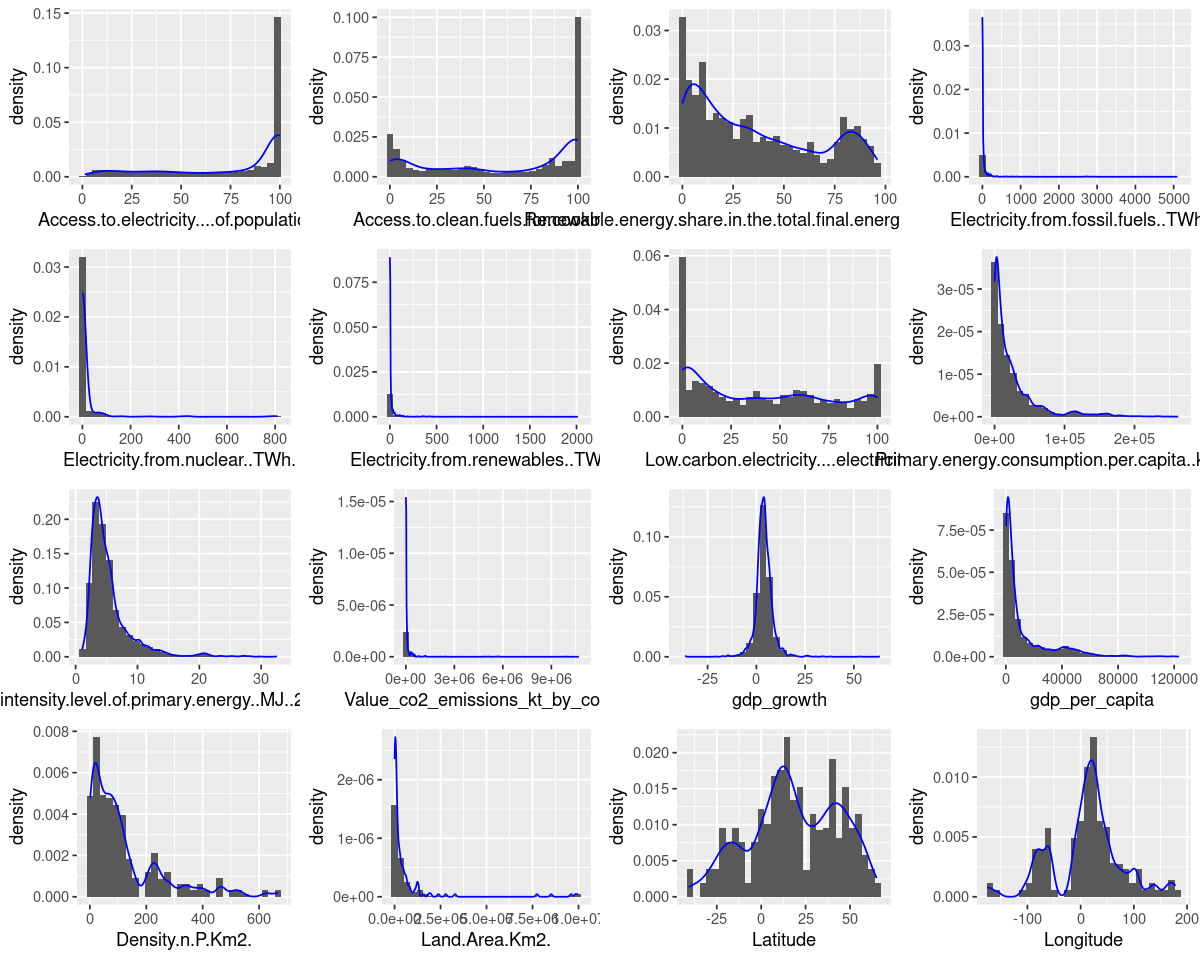

In [110]:
## que des variables quantitatives mis à part Entity et Year

g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

In [113]:
energy[, "Access.to.electricity....of.population."] <- sqrt(energy[, "Access.to.electricity....of.population."])
energy[, "Access.to.clean.fuels.for.cooking"] <- sqrt(energy[, "Access.to.clean.fuels.for.cooking"])
energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."] <- sqrt(energy[, "Renewable.energy.share.in.the.total.final.energy.consumption...."])
energy[, "Electricity.from.fossil.fuels..TWh."] <- sqrt(energy[, "Electricity.from.fossil.fuels..TWh."])
energy[, "Electricity.from.nuclear..TWh."] <- sqrt(energy[, "Electricity.from.nuclear..TWh."])
energy[, "Electricity.from.renewables..TWh."] <- sqrt(energy[, "Electricity.from.renewables..TWh."])
energy[, "Low.carbon.electricity....electricity."] <- sqrt(energy[, "Low.carbon.electricity....electricity."])
energy[, "Primary.energy.consumption.per.capita..kWh.person."] <- log(energy[, "Primary.energy.consumption.per.capita..kWh.person."])
energy[, "Value_co2_emissions_kt_by_country"] <- log(energy[, "Value_co2_emissions_kt_by_country"])
energy[, "gdp_per_capita"] <- log(energy[, "gdp_per_capita"])
energy[, "Density.n.P.Km2."] <- log(energy[, "Density.n.P.Km2."])
energy[, "Land.Area.Km2."] <- log(energy[, "Land.Area.Km2."]) ### si je fais log pour electricity et pas sqrt, j'ai des pb lors de l'acp

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwid

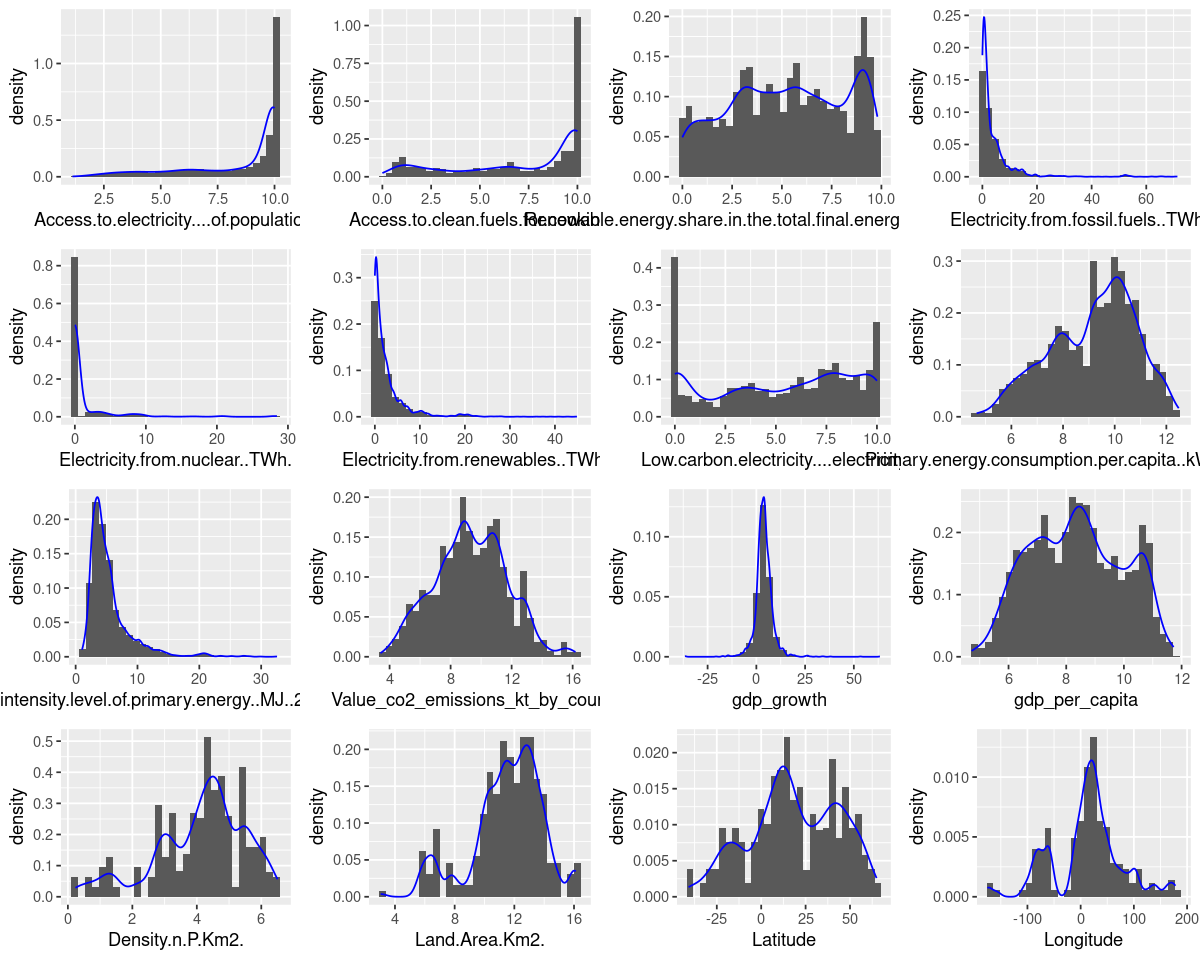

In [114]:
g1<-ggplot(energy,aes(x=Access.to.electricity....of.population.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g2<-ggplot(energy,aes(x=Access.to.clean.fuels.for.cooking))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g3<-ggplot(energy,aes(x=Renewable.energy.share.in.the.total.final.energy.consumption....))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g4<-ggplot(energy,aes(x=Electricity.from.fossil.fuels..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g5<-ggplot(energy,aes(x=Electricity.from.nuclear..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g6<-ggplot(energy,aes(x=Electricity.from.renewables..TWh.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g7<-ggplot(energy,aes(x=Low.carbon.electricity....electricity.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g8<-ggplot(energy,aes(x=Primary.energy.consumption.per.capita..kWh.person.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g9<-ggplot(energy,aes(x=Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g10<-ggplot(energy,aes(x=Value_co2_emissions_kt_by_country))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g11<-ggplot(energy,aes(x=gdp_growth))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g12<-ggplot(energy,aes(x=gdp_per_capita))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue")
g13<-ggplot(energy,aes(x=Density.n.P.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g14<-ggplot(energy,aes(x=Land.Area.Km2.))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g15<-ggplot(energy,aes(x=Latitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
g16<-ggplot(energy,aes(x=Longitude))+geom_histogram(aes(y=..density..))+geom_density(alpha=.2, col="blue") 
grid.arrange(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,ncol=4)
rm(g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16)

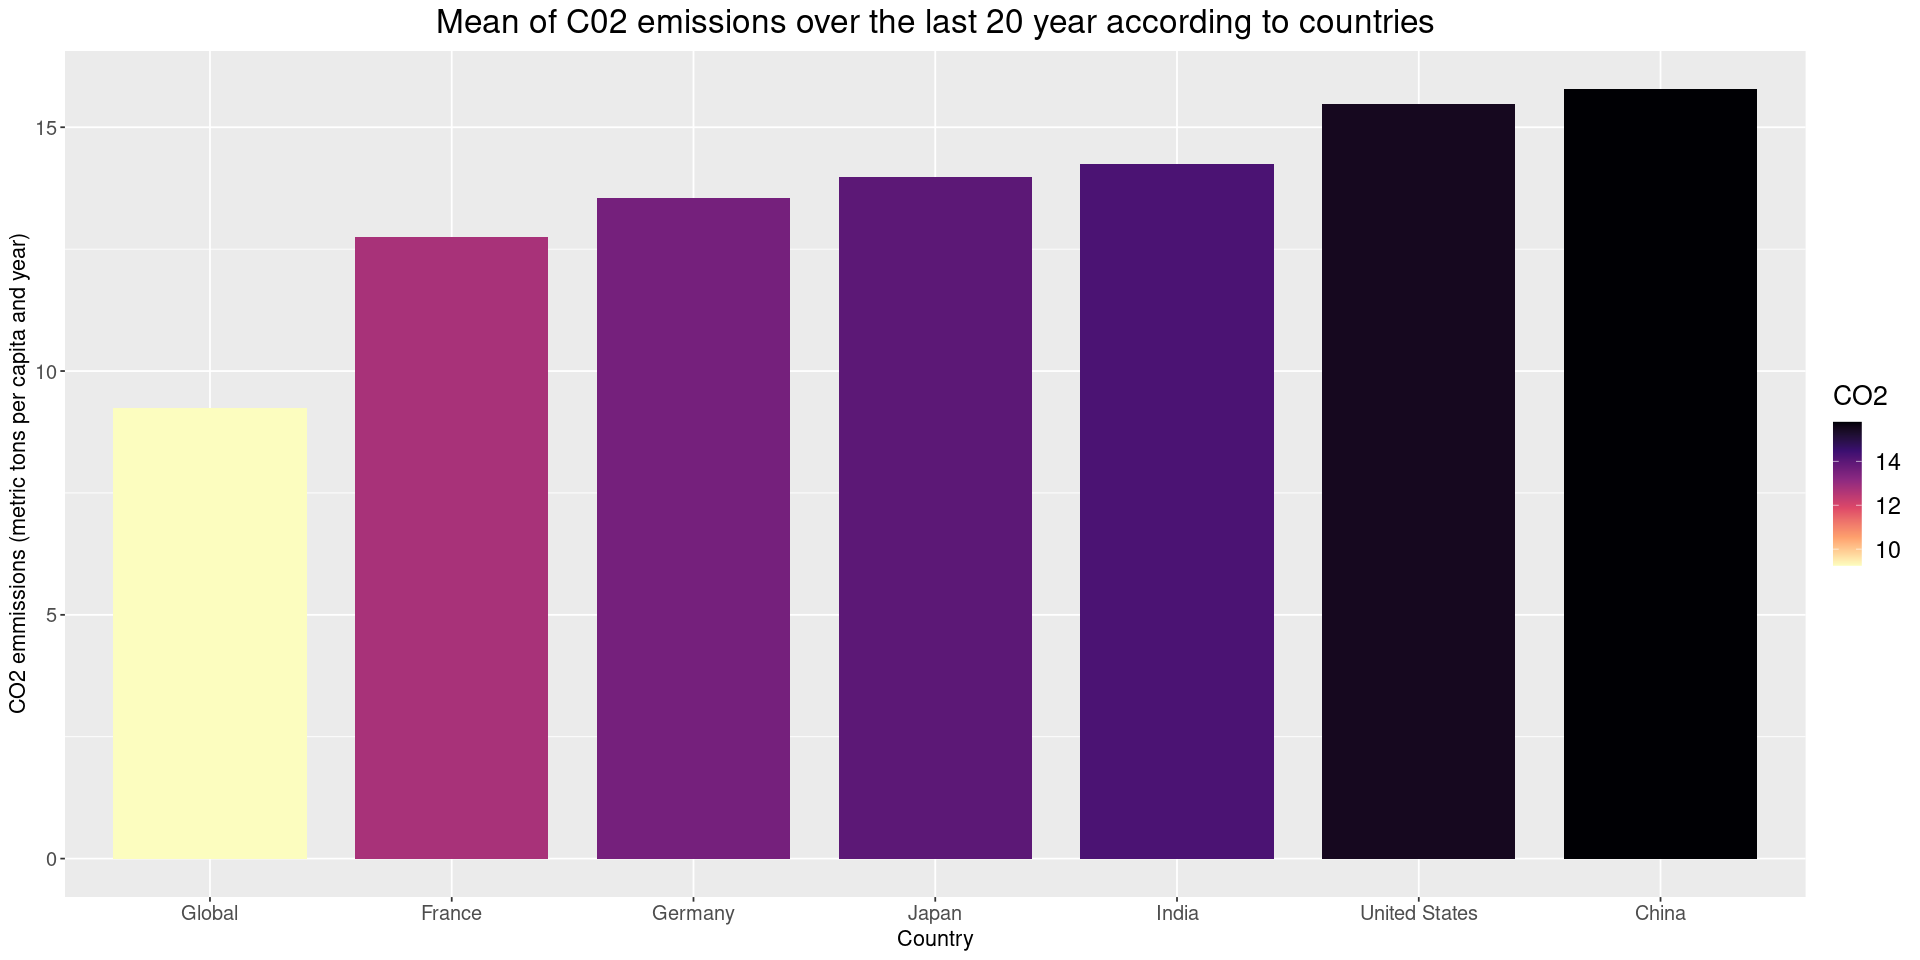

In [129]:
options(repr.plot.width = 16)
df <- energy$Value_co2_emissions_kt_by_country
df <-  matrix(df, nrow = 2868)
df <- as.data.frame(df)
colnames(df) = list("CO2")
df$Country <- energy$Entity
df_mean <- summarise(group_by(df, Country), mean_value = mean(CO2))
CO2 <- df_mean$mean_value
Country <- df_mean$Country
df <- data.frame(Country = Country, CO2 = CO2)
fr <- df[48,] ## france
df <- arrange(df, desc(CO2))
top_5 <- head(df, 5)
last_5 <- tail(df,5)
moyenne <- mean(df$CO2)
mean <- data.frame("Country" = "Global", "CO2" = moyenne)
df <- rbind(top_5, fr)
df <- rbind(df,mean)
#df <- rbind(df,last_5)
ggplot(df, aes(x=reorder(Country, CO2), y=CO2, fill=CO2)) +
  geom_bar(stat = "identity", position = "stack", width = 0.8) +
  labs(title = "Mean of C02 emissions over the last 20 year according to countries", x = "Country", y = "CO2 emmissions (metric tons per capita and year)") +
  theme(plot.title = element_text(size = 20, hjust = 0.5), 
        axis.text.y = element_text(size = 12),
        axis.title.y = element_text(size = 13),
        axis.text.x = element_text(size = 12),
       axis.title.x = element_text(size = 13),
       legend.text = element_text(size = 14),  # Ajuster la taille du texte de la légende
       legend.title = element_text(size = 16),  # Ajuster la taille du titre de la légende
       legend.position = "right") + 
       scale_fill_viridis_c(option = "A", direction = -1)

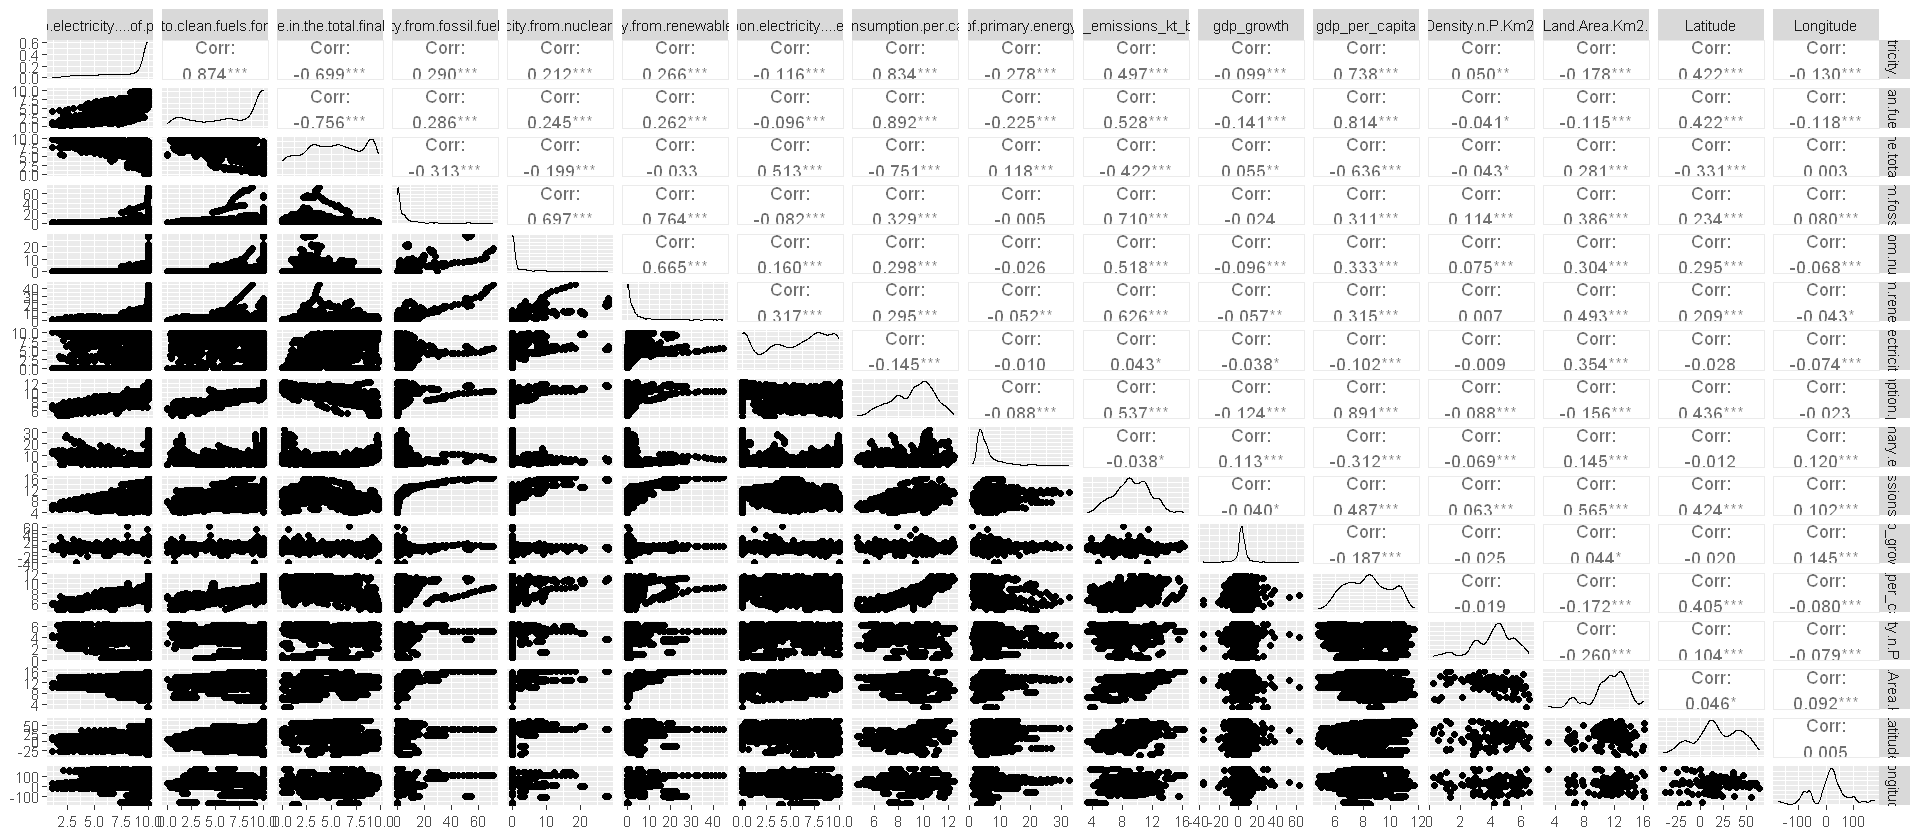

In [59]:
ggpairs(energy[, c(3:18)])

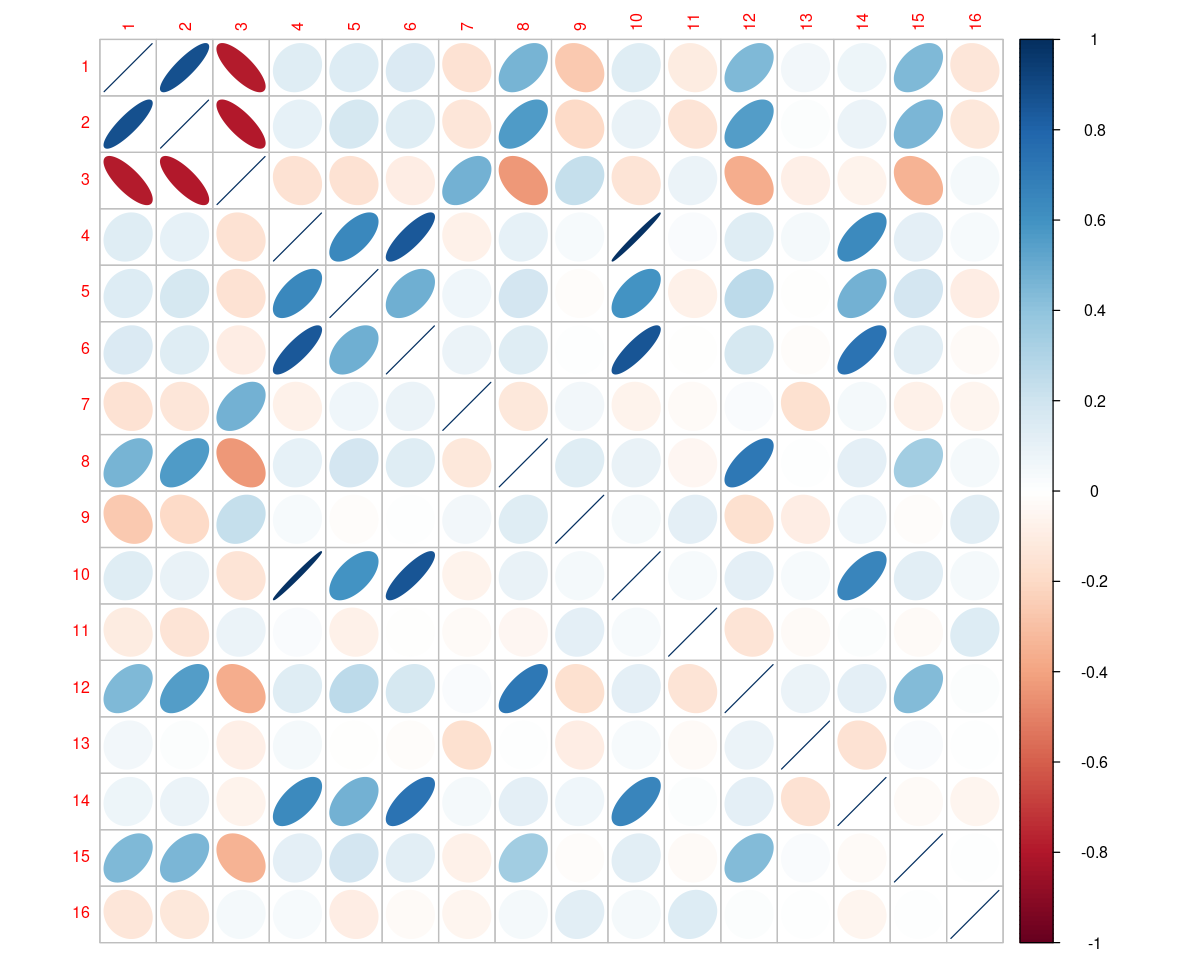

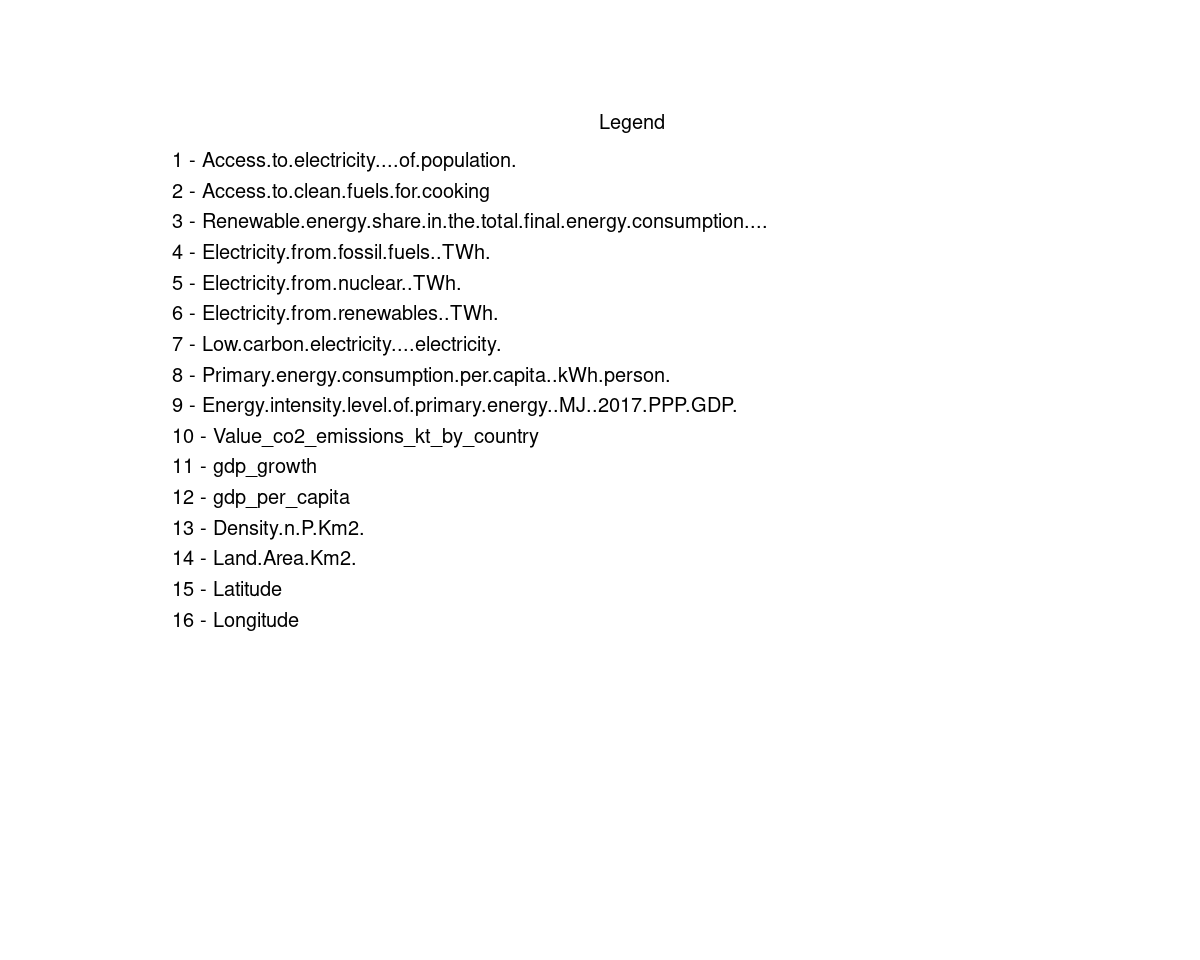

In [112]:
library(corrplot)
options(repr.plot.width = 10, repr.plot.height = 8)
energy2 <- energy
original_names <- colnames(energy2)[3:18]
# Renommer les colonnes
colnames(energy2)[3:18] <- 1:16

# Matrice de corrélation
cor_matrix <- cor(energy2[, c(3:18)])

# Afficher le corrplot avec une taille de police plus grande pour les noms de variables
corrplot(cor_matrix, method = "ellipse", tl.cex = 0.8)

# Légende pour montrer la correspondance entre les numéros et les noms originaux des variables
plot.new()
legend_names <- c(paste(1:16, " - ",original_names, sep = ""))
legend("topright", legend = legend_names, title = "Legend", cex = 1, bty = "n", col = "black")

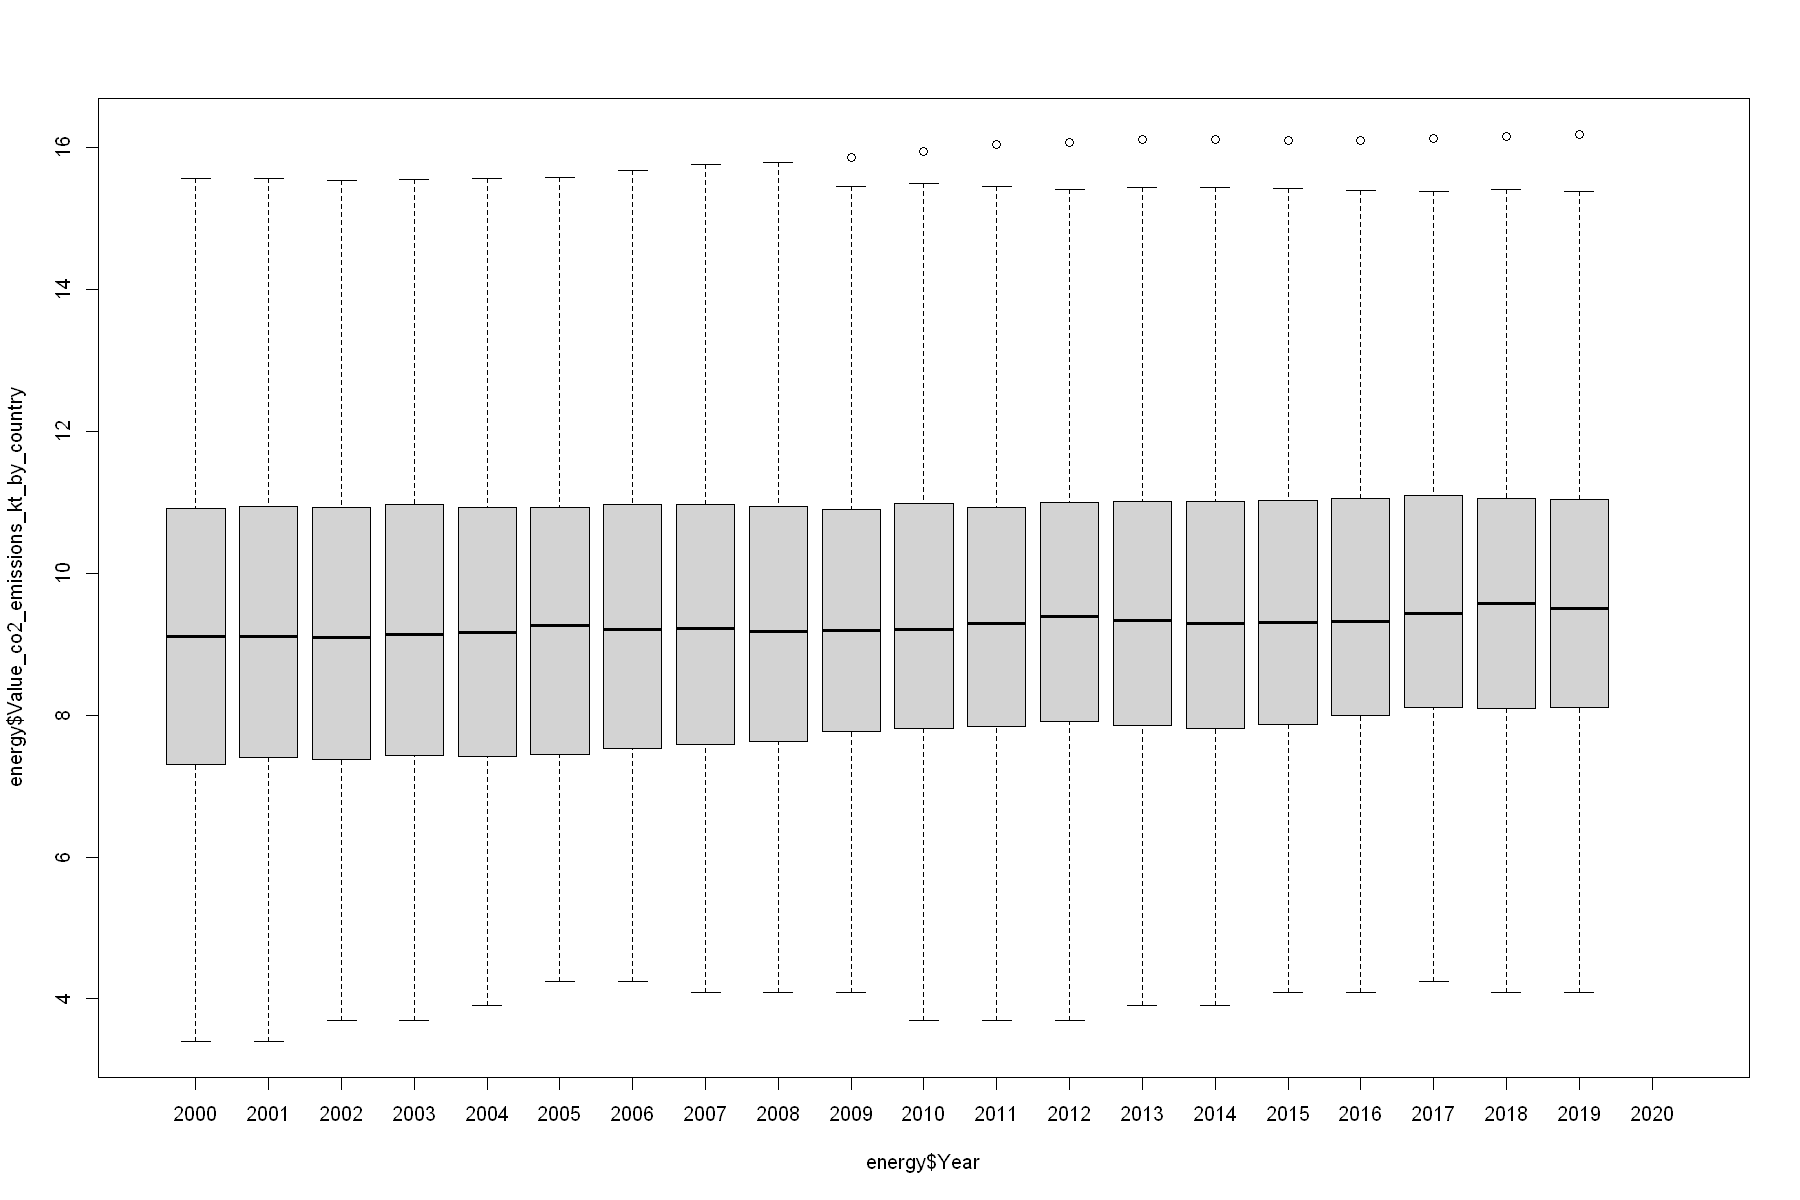

In [465]:
boxplot(energy$Value_co2_emissions_kt_by_country ~ energy$Year, data=energy)

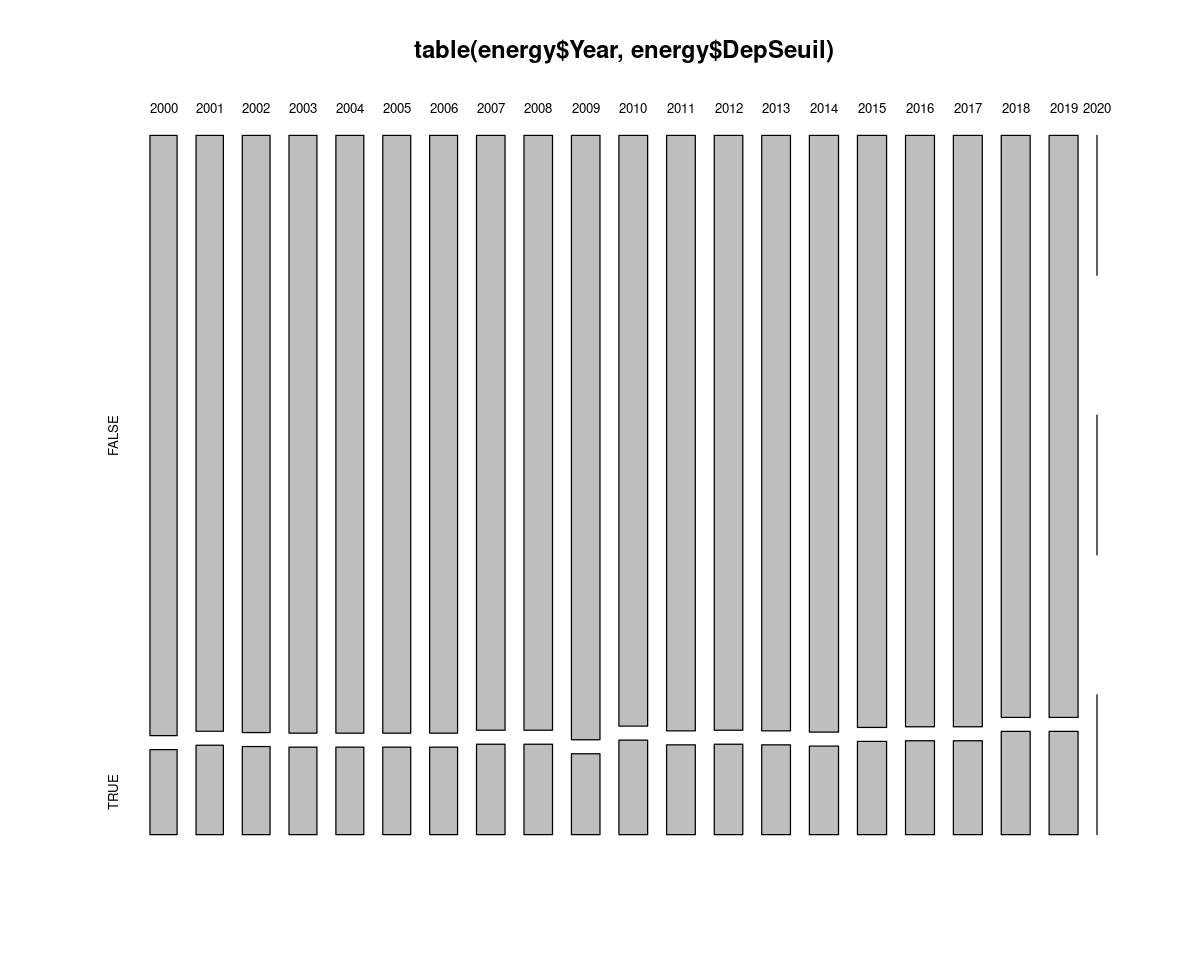

In [115]:
### O3obs en fonction des variables qualitatives
energy[, "DepSeuil"] <- as.factor(energy[, "Value_co2_emissions_kt_by_country"] > 12)
mosaicplot(table(energy$Year,energy$DepSeuil))

In [127]:
library(FactoMineR)
head(energy)
acp <- PCA(energy[, c(3:11,13:18)], scale.unit = TRUE,
           graph = FALSE, quali.sup = c(19,1,2), quanti.sup = 12, ncp = 15)
# Décroissance des valeurs propres
library(factoextra)
g1<-fviz_eig(acp, addlabels = TRUE, ylim = c(0, 40))
library(reshape2)
g2<-ggplot(melt(acp$ind$coord),aes(x=Var2,y=value))+
  geom_boxplot()+
  xlab("")
grid.arrange(g1,g2,ncol=2)

,Entity,Year,Access.to.electricity....of.population.,Access.to.clean.fuels.for.cooking,Renewable.energy.share.in.the.total.final.energy.consumption....,Electricity.from.fossil.fuels..TWh.,Electricity.from.nuclear..TWh.,Electricity.from.renewables..TWh.,Low.carbon.electricity....electricity.,Primary.energy.consumption.per.capita..kWh.person.,Energy.intensity.level.of.primary.energy..MJ..2017.PPP.GDP.,Value_co2_emissions_kt_by_country,gdp_growth,gdp_per_capita,Density.n.P.Km2.,Land.Area.Km2.,Latitude,Longitude,DepSeuil
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,Afghanistan,2003,3.839076,3.082207,6.054750,0.5567764,0,0.7937254,8.186653,5.437941,1.40,7.106606,8.832278,5.250617,4.094345,13.38815,33.93911,67.70995,FALSE
5,Afghanistan,2004,4.479394,3.301515,6.651316,0.5744563,0,0.7483315,7.932298,5.319253,1.20,6.937314,1.414118,5.353667,4.094345,13.38815,33.93911,67.70995,FALSE
6,Afghanistan,2005,5.038938,3.492850,5.820653,0.5830952,0,0.7681146,7.964977,5.529703,1.41,7.346010,11.229715,5.489067,4.094345,13.38815,33.93911,67.70995,FALSE
7,Afghanistan,2006,5.542444,3.721559,5.647123,0.4472136,0,0.8000000,8.728716,5.718411,1.50,7.473069,5.357403,5.574940,4.094345,13.38815,33.93911,67.70995,FALSE
8,Afghanistan,2007,6.004249,3.911521,5.364699,0.4472136,0,0.8660254,8.885233,5.870087,1.53,7.478735,13.826320,5.885251,4.094345,13.38815,33.93911,67.70995,FALSE
9,Afghanistan,2008,6.511528,4.086563,4.601087,0.4358899,0,0.7348469,8.600733,6.409901,1.94,8.177516,3.924984,5.898975,4.094345,13.38815,33.93911,67.70995,FALSE


ERROR: Error in `[.data.frame`(Xtot, , quali.sup, drop = FALSE): colonnes non définies sélectionnées


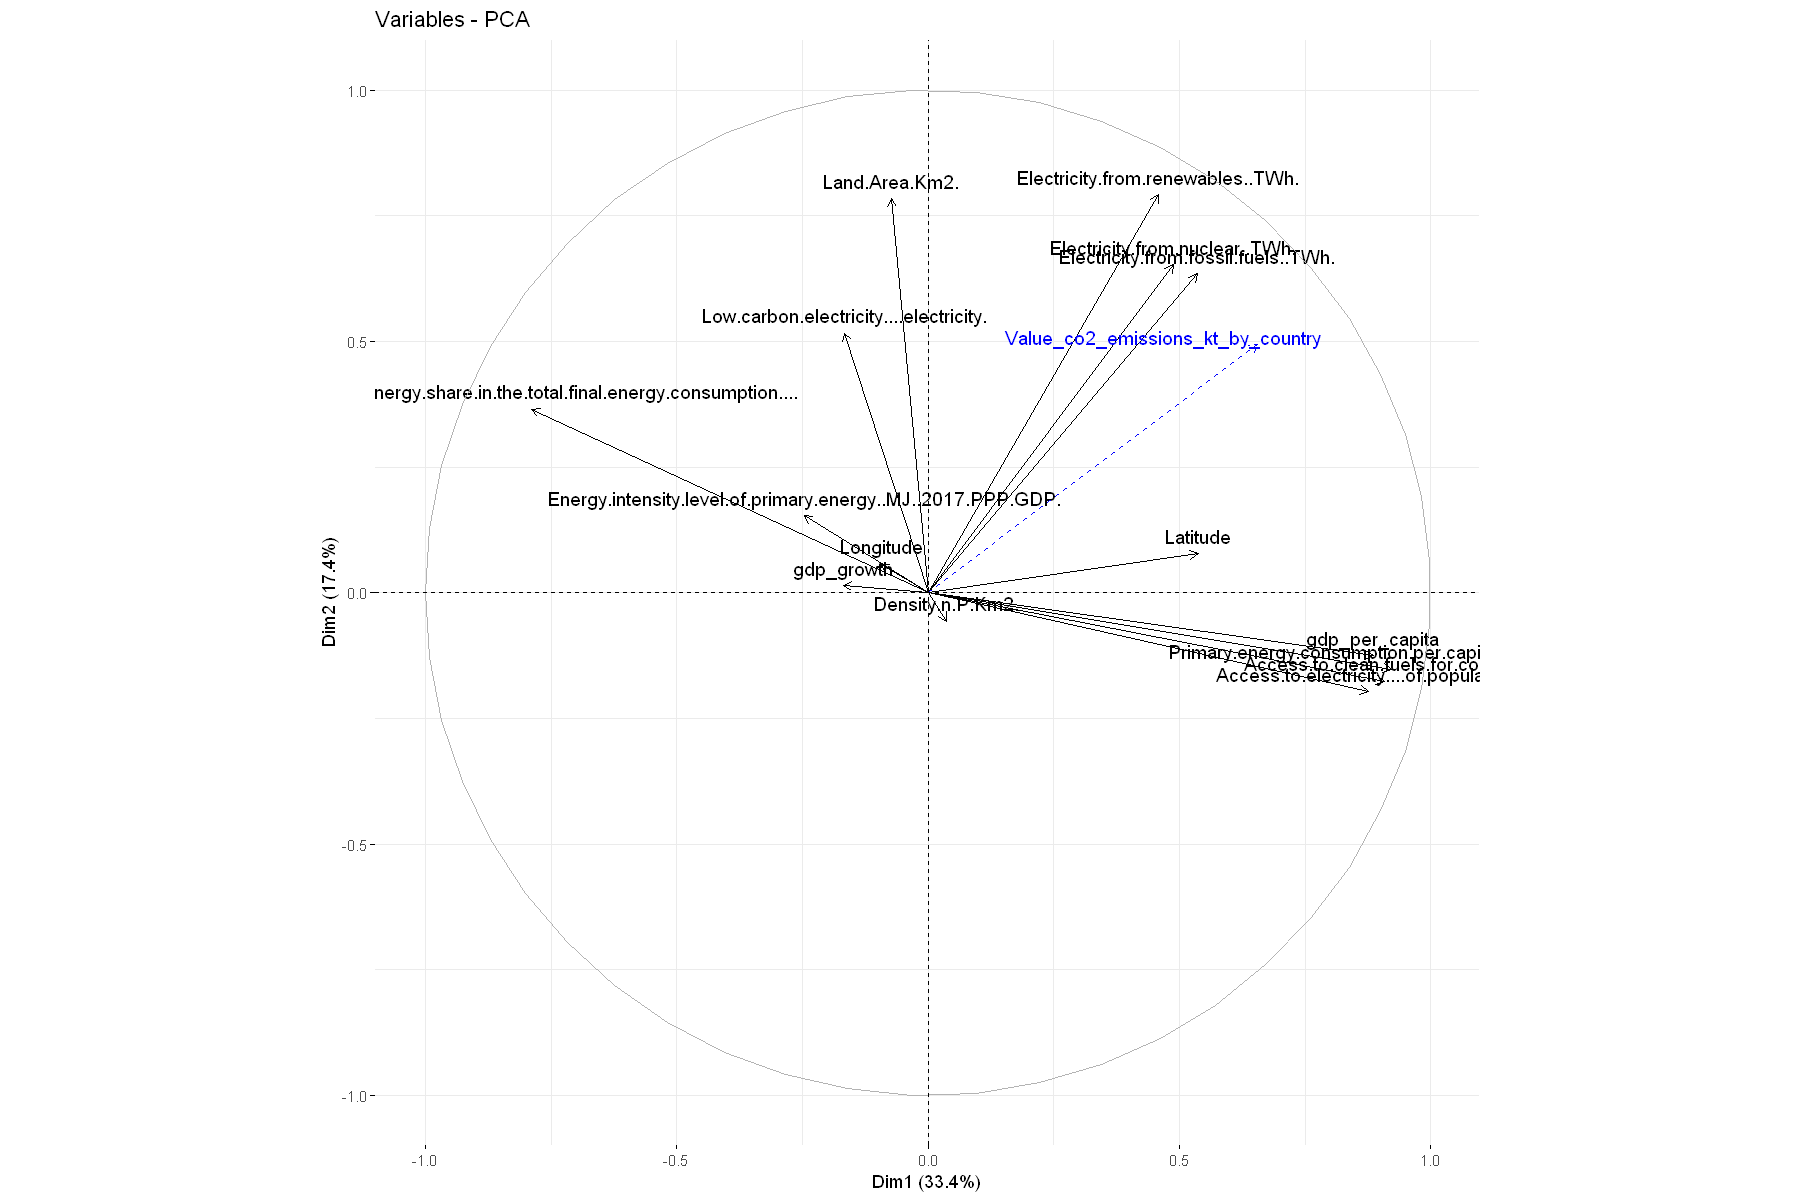

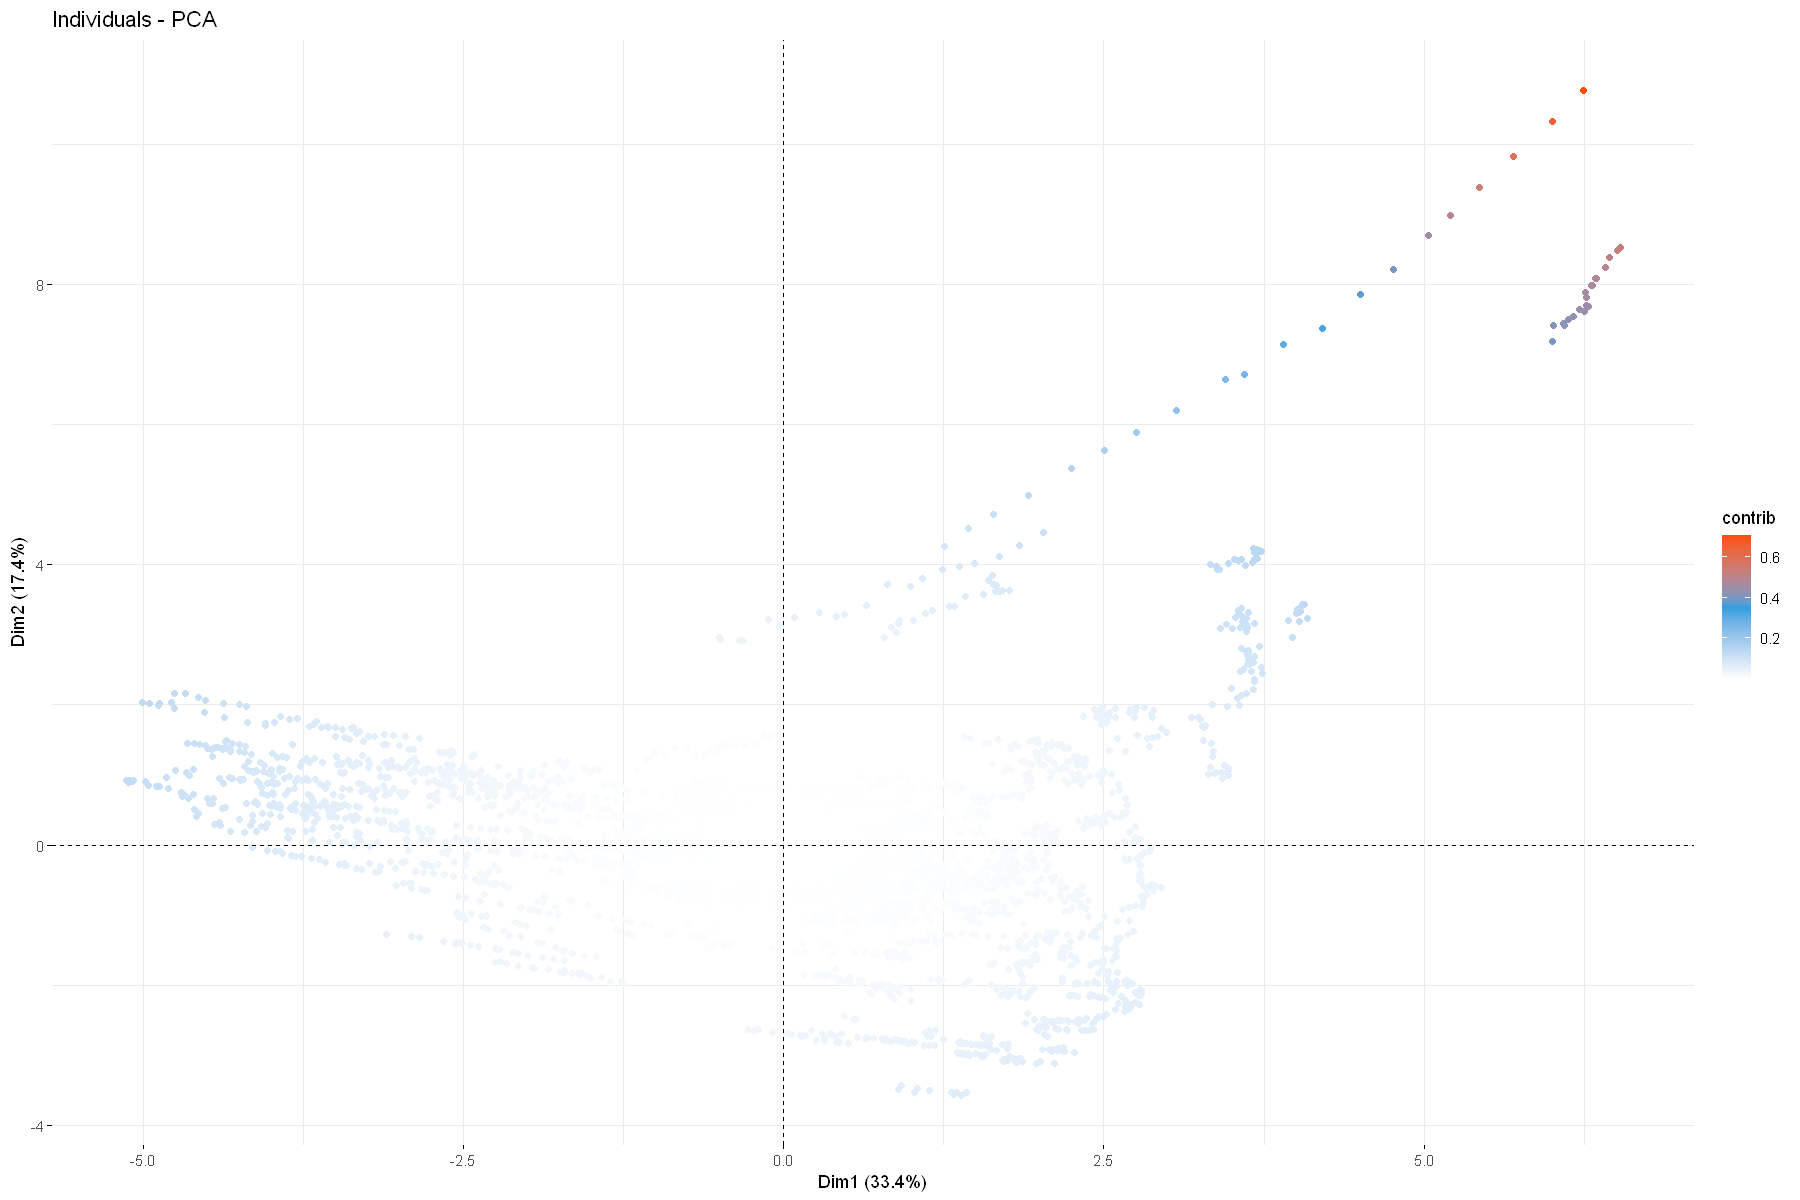

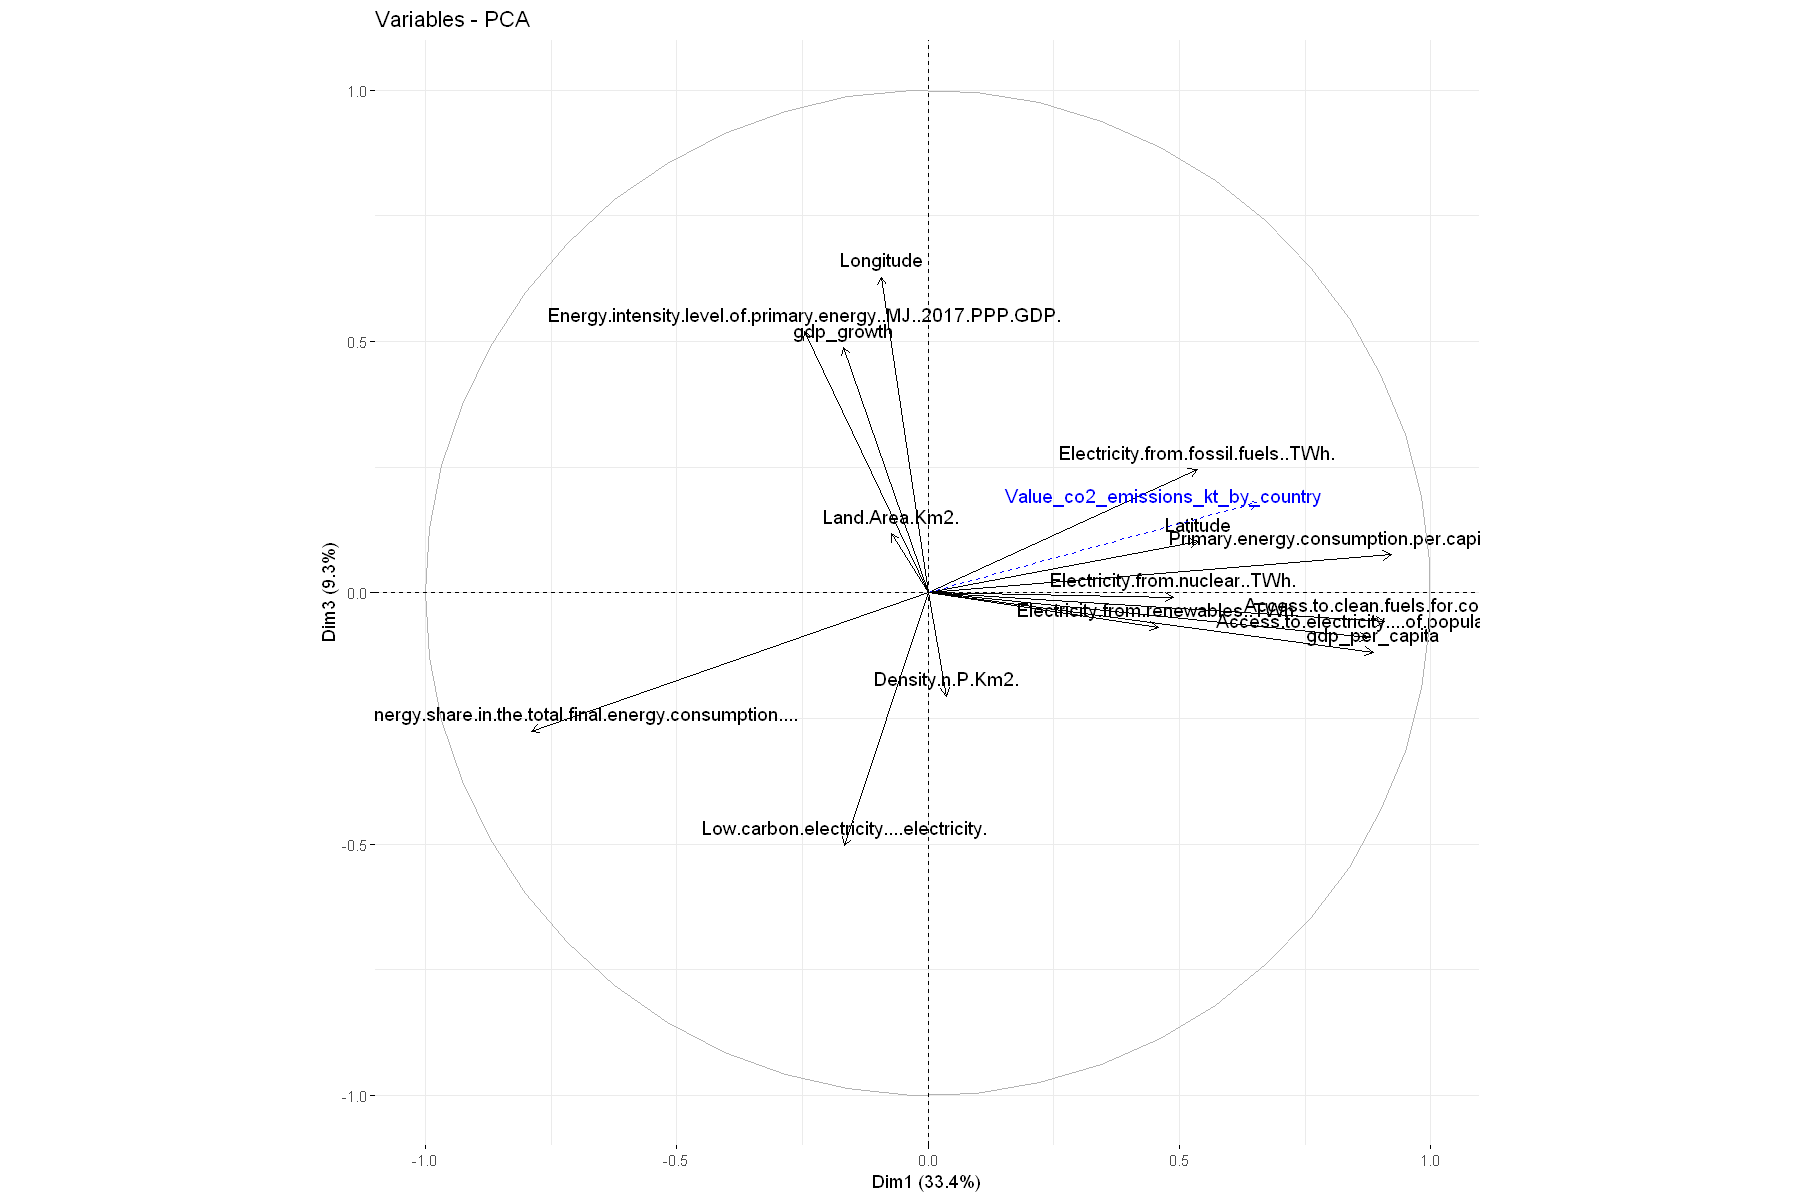

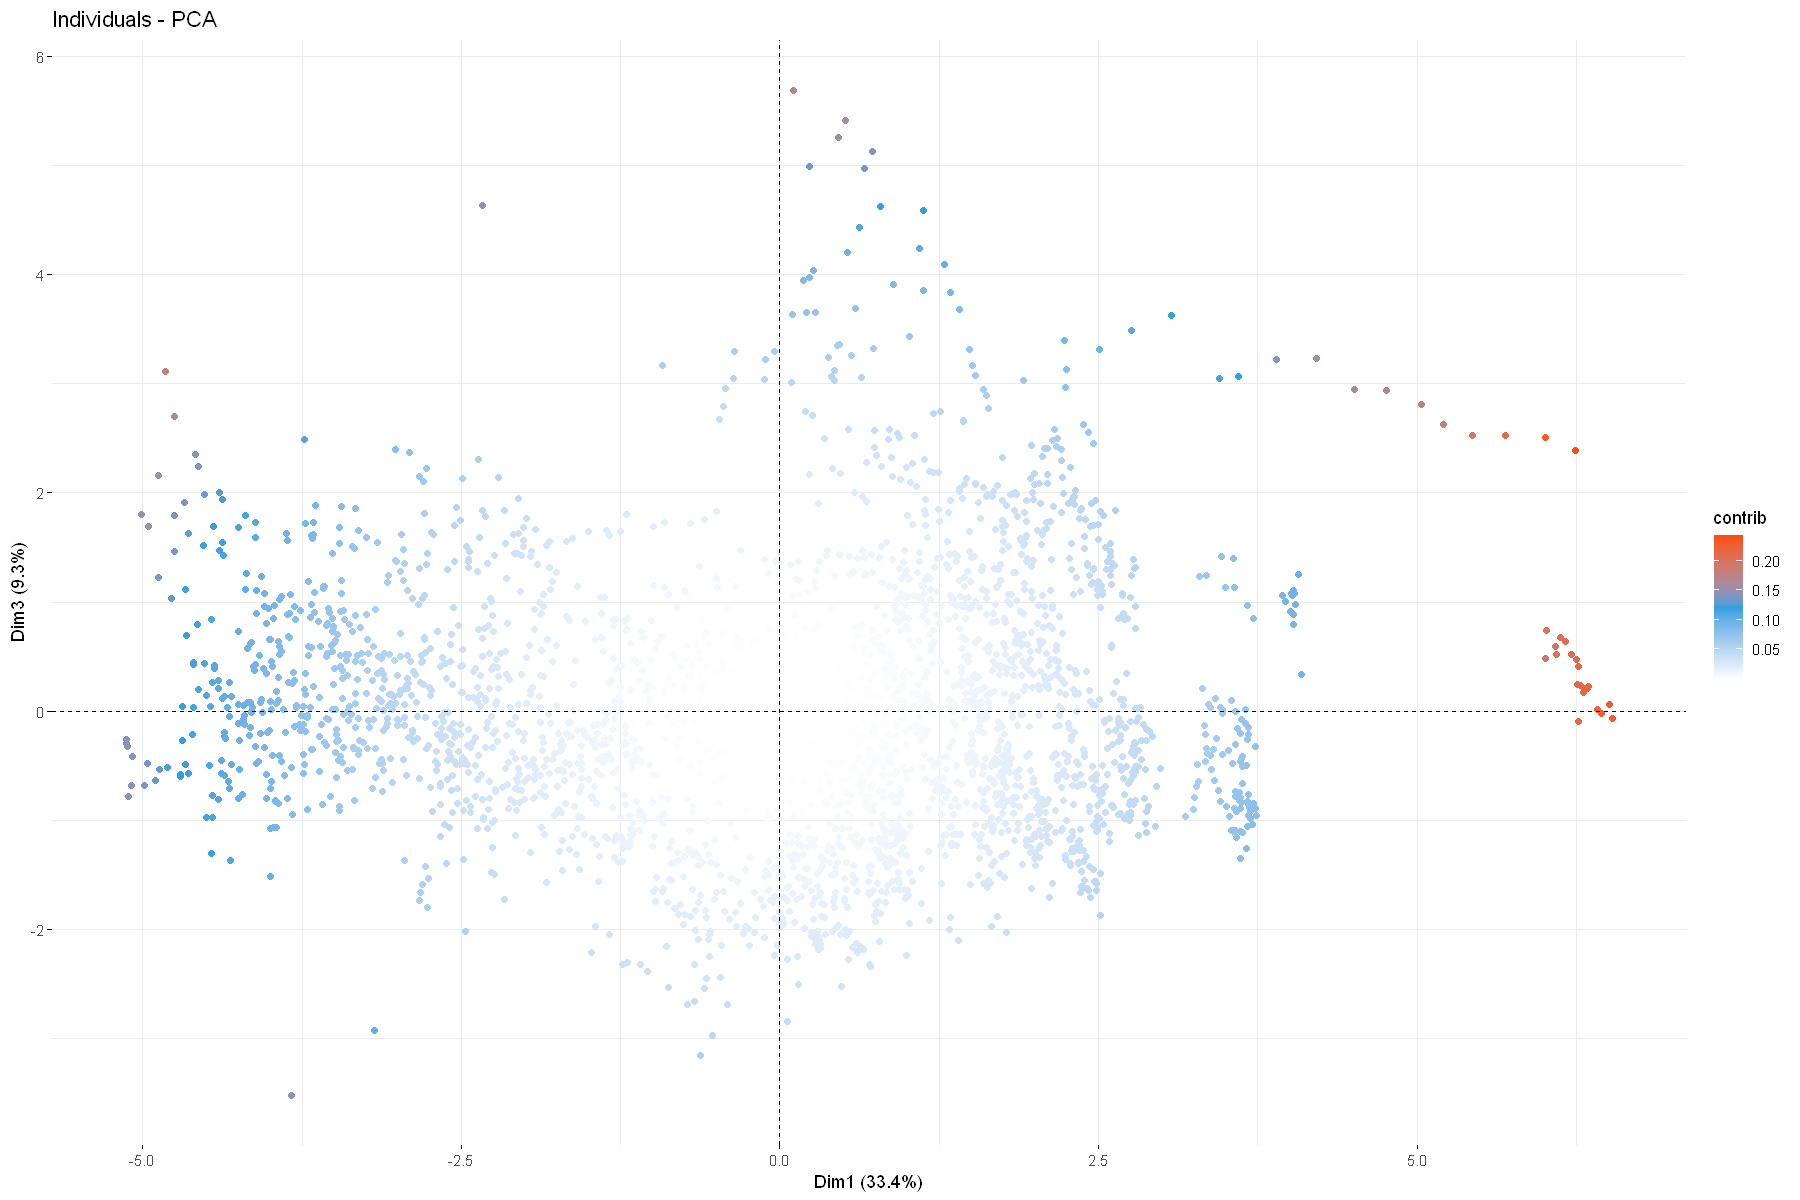

In [500]:
fviz_pca_var(acp)
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ))
fviz_pca_var(acp,axes=c(1,3))
fviz_pca_ind(acp,col.ind="contrib",label="none",gradient.cols = c("white", "#2E9FDF", "#FC4E07" ),axes=c(1,3))

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '134' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '143' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '154' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '178' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '191' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '217' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '765' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '772' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '778' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '782' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '635' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '633' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '631' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '28'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '238' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '266' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '292' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '326' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$si

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '735' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '740' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '746' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '751' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '753' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '756' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '762' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '765' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '370' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '373' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '388' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '398' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '406' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '419' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '430' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '623' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '630' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '638' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '647' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '651' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '663' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '668' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '679' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '599' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '617' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '631' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '651' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '668' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '684' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '696' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '28'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '240' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '239' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '240' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '241' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '243' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '245' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '249' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$si

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '603' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '618' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '625' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '636' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '647' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '658' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '669' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '678' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '594' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '608' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '29'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '264' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '275' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '286' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch val

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '244' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '252' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '262' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '274' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '289' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '297' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '312' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '334' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '819' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '820' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '256' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '268' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '278' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '286' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '293' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '300' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '314' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '792' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '798' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '803' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '806' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '808' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '810' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '662' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '667' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '667' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '664' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '663' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '661' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '26'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '28'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '28'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“unimplemented pch value '30'”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '142' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '159' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '175' is invalid in this locale”
War

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '684' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '685' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '693' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '660' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '671' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '678' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '681' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '645' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '664' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '670' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '679' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '679' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '686' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '694' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '704' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '712' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '719' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '622' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '625' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '459' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '469' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '483' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '497' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '507' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '518' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '807' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '810' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '812' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '814' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '815' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '816' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '818' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '818' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '821' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '665' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '670' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '669' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '671' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '669' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '671' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '668' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '668' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '134' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '135' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '136' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '137' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '138' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '139' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '140' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '141' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '204' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '205' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '206' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '207' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '208' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '209' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '210' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '211' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '274' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '275' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '276' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '277' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '278' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '279' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '280' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '281' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '344' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '345' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '346' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '347' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '348' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '349' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '350' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '351' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '414' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '415' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '416' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '417' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '418' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '419' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '420' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '421' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '484' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '485' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '486' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '487' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '488' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '489' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '490' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '491' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '554' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '555' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '556' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '557' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '558' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '559' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '560' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '561' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '624' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '625' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '626' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '627' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '628' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '629' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '630' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '631' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '694' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '695' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '696' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '697' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '698' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '699' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '700' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '701' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '764' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '765' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '766' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '767' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '768' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '769' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '770' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '771' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '128' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '129' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '130' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '131' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '131' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '132' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '163' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '164' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '164' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '165' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '166' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '167' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '198' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '199' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '199' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '200' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '200' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '201' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '202' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '233' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '234' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '234' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '235' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '235' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '236' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '236' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '237' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '268' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '269' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '269' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '270' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '271' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '271' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '272' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '303' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '304' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '304' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '305' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '305' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '306' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '307' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '338' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '339' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '339' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '340' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '340' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '341' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '341' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '342' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '373' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '374' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '374' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '375' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '375' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '376' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '376' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '377' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '408' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '409' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '409' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '410' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '410' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '411' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '411' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '412' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '443' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '444' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '445' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '445' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '446' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '446' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '447' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '478' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '479' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '479' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '480' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '480' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '481' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '481' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '482' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '513' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '514' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '514' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '515' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '515' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '516' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '516' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '517' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '548' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '549' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '549' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '550' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '550' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '551' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '551' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '552' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '583' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '584' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '585' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '585' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '586' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '587' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '618' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '619' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '619' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '620' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '620' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '621' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '621' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '622' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '653' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '654' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '654' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '655' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '656' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '656' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '657' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '688' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '689' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '690' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '691' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '692' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '723' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '724' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '724' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '725' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '725' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '726' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '727' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '758' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '759' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '759' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '760' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '760' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '761' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '761' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '762' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '793' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '794' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '794' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '795' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '795' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '796' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '796' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
“pch value '797' is invalid in this locale”
Warning message in grid.Call.graphics(C_points, x$x, x$y

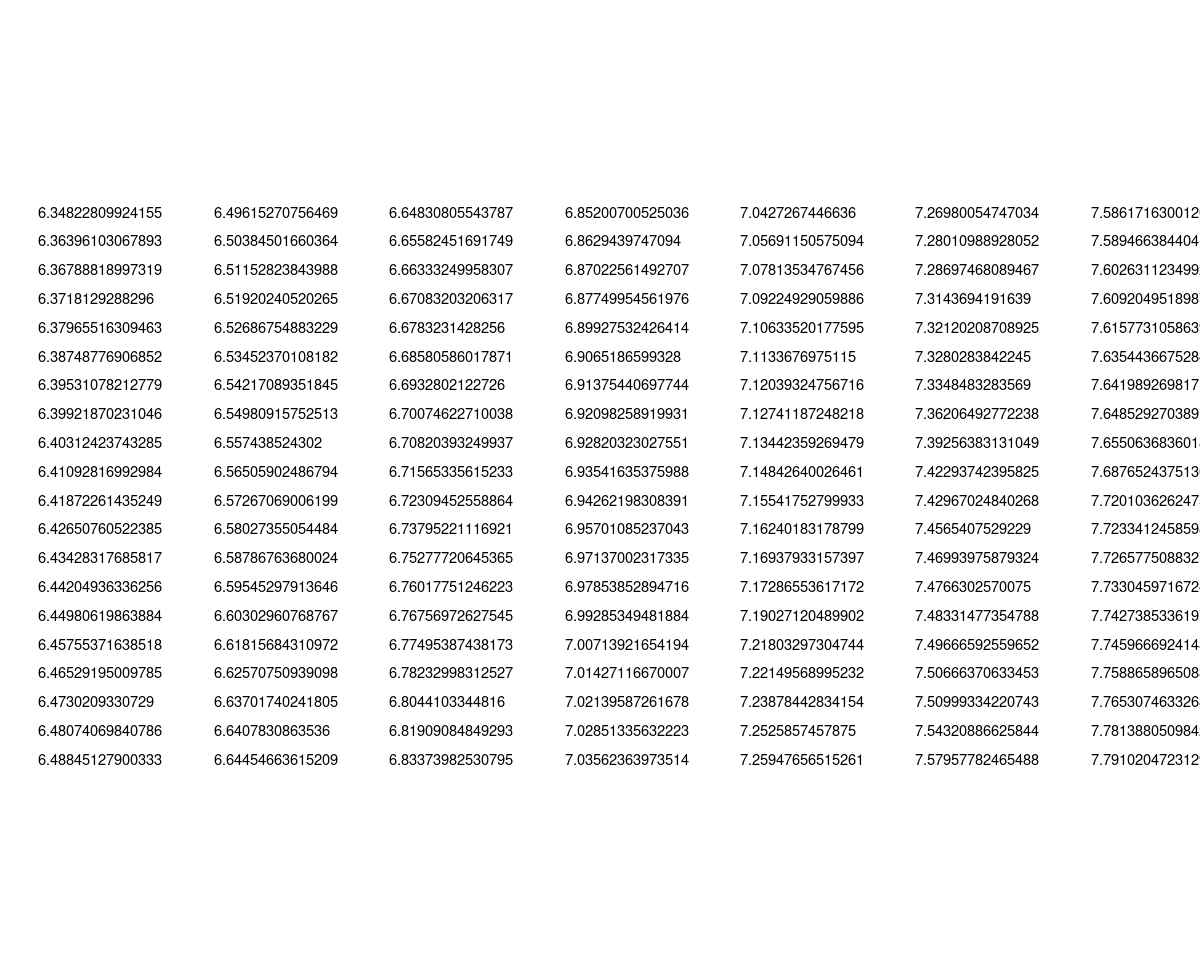

In [124]:
fviz_pca_ind(acp, label="none", habillage=2)